In [25]:
import datetime
import json
import logging
import os

from xcube.core.store import new_data_store
import numpy as np
from zappend.api import zappend


logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler()]
)

LOG = logging.getLogger("MyLogger")

In [26]:
with open("cds-credentials.json") as f:
    credentials = json.load(f)

cds_store = new_data_store(
    "cds",
    **credentials,
    normalize_names=True,
)

In [27]:
store_team = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=4,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [28]:
def get_time_ranges():
    time_ranges = []
    start = datetime.date.fromisoformat("2016-11-01")
    end = datetime.date.fromisoformat("2016-12-31")
    count_start = start
    while count_start < end:
        count_end = count_start + datetime.timedelta(days=1)
        time_ranges.append([count_start.isoformat(), count_end.isoformat()])
        count_start = count_end + datetime.timedelta(days=1)
    time_ranges[-1][1] = end.isoformat()
    
    for year in range(2017, 2025):
        start = datetime.date.fromisoformat(f"{year}-01-01")
        end = datetime.date.fromisoformat(f"{year}-12-31")
        count_start = start
        while count_start < end:
            count_end = count_start + datetime.timedelta(days=1)
            time_ranges.append([count_start.isoformat(), count_end.isoformat()])
            count_start = count_end + datetime.timedelta(days=1)
        time_ranges[-1][1] = end.isoformat()

    return time_ranges

time_ranges = get_time_ranges()
time_ranges

[['2016-11-01', '2016-11-02'],
 ['2016-11-03', '2016-11-04'],
 ['2016-11-05', '2016-11-06'],
 ['2016-11-07', '2016-11-08'],
 ['2016-11-09', '2016-11-10'],
 ['2016-11-11', '2016-11-12'],
 ['2016-11-13', '2016-11-14'],
 ['2016-11-15', '2016-11-16'],
 ['2016-11-17', '2016-11-18'],
 ['2016-11-19', '2016-11-20'],
 ['2016-11-21', '2016-11-22'],
 ['2016-11-23', '2016-11-24'],
 ['2016-11-25', '2016-11-26'],
 ['2016-11-27', '2016-11-28'],
 ['2016-11-29', '2016-11-30'],
 ['2016-12-01', '2016-12-02'],
 ['2016-12-03', '2016-12-04'],
 ['2016-12-05', '2016-12-06'],
 ['2016-12-07', '2016-12-08'],
 ['2016-12-09', '2016-12-10'],
 ['2016-12-11', '2016-12-12'],
 ['2016-12-13', '2016-12-14'],
 ['2016-12-15', '2016-12-16'],
 ['2016-12-17', '2016-12-18'],
 ['2016-12-19', '2016-12-20'],
 ['2016-12-21', '2016-12-22'],
 ['2016-12-23', '2016-12-24'],
 ['2016-12-25', '2016-12-26'],
 ['2016-12-27', '2016-12-28'],
 ['2016-12-29', '2016-12-31'],
 ['2017-01-01', '2017-01-02'],
 ['2017-01-03', '2017-01-04'],
 ['2017-

In [ ]:
# extract ERA5 from CDS
bbox = [-5, 40, 35, 65]
variable_names = [
    "2m_dewpoint_temperature",
    "2m_temperature",
    "skin_temperature",
    "soil_temperature_level_1",
    "soil_temperature_level_2",
    "soil_temperature_level_3",
    "soil_temperature_level_4",
    "skin_reservoir_content",
    "volumetric_soil_water_layer_1",
    "volumetric_soil_water_layer_2",
    "volumetric_soil_water_layer_3",
    "volumetric_soil_water_layer_4",
    "forecast_albedo",
    "surface_latent_heat_flux",
    "surface_net_solar_radiation",
    "surface_net_thermal_radiation",
    "surface_sensible_heat_flux",
    "surface_solar_radiation_downwards",
    "surface_thermal_radiation_downwards",
    "potential_evaporation",
    "runoff",
    "total_evaporation",
    "10m_u_component_of_wind",
    "10m_v_component_of_wind",
    "surface_pressure",
    "total_precipitation",
    "leaf_area_index_high_vegetation",
    "leaf_area_index_low_vegetation"
]
for time_range in time_ranges:
    file_name = time_range[0].replace("-", "_")
    data_id = f"cubes/aux/era5_land/{file_name}.zarr"
    if store_team.has_data(data_id):
        print(f"ERS5 for {time_range} is already written to {data_id}")
        continue
    print(time_range)
    ds = cds_store.open_data(
        "reanalysis-era5-land",
        "dataset:netcdf:cds",
        variable_names=variable_names,
        bbox=bbox,
        spatial_res=0.1,
        time_range=time_range,
    )
    store_team.write_data(ds, data_id, replace=True)
    print(f"ERS5 for {time_range} is written to {data_id}")

xcube-cds version 1.0.0
2025-05-07 12:54:34,456 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 12:54:34,456 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 12:54:34,457 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 12:54:34,457 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


['2016-11-01', '2016-11-02']


2025-05-07 12:54:34,616 INFO Request ID is 8d7840a2-cbc4-4c04-9bf6-bbc09dac8e51
2025-05-07 12:54:34,616 - INFO - Request ID is 8d7840a2-cbc4-4c04-9bf6-bbc09dac8e51
2025-05-07 12:54:34,685 INFO status has been updated to accepted
2025-05-07 12:54:34,685 - INFO - status has been updated to accepted
2025-05-07 12:54:48,257 INFO status has been updated to running
2025-05-07 12:54:48,257 - INFO - status has been updated to running
2025-05-07 12:58:53,404 INFO status has been updated to successful
2025-05-07 12:58:53,404 - INFO - status has been updated to successful
2025-05-07 12:58:53,533 - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2025-05-07/9915a976e835b74bb9167c0f27b8df56.zip


9915a976e835b74bb9167c0f27b8df56.zip:   0%|          | 0.00/170M [00:00<?, ?B/s]

xcube-cds version 1.0.0
2025-05-07 12:59:12,467 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 12:59:12,467 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 12:59:12,468 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 12:59:12,468 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


ERS5 for ['2016-11-01', '2016-11-02'] is written to cubes/aux/era5_land/2016_11_01.zarr
['2016-11-03', '2016-11-04']


2025-05-07 12:59:13,007 INFO Request ID is 51a42a89-26e8-4818-8784-4fc78a7cd901
2025-05-07 12:59:13,007 - INFO - Request ID is 51a42a89-26e8-4818-8784-4fc78a7cd901
2025-05-07 12:59:13,051 INFO status has been updated to accepted
2025-05-07 12:59:13,051 - INFO - status has been updated to accepted
2025-05-07 12:59:34,192 INFO status has been updated to running
2025-05-07 12:59:34,192 - INFO - status has been updated to running
2025-05-07 12:59:45,653 INFO status has been updated to successful
2025-05-07 12:59:45,653 - INFO - status has been updated to successful
2025-05-07 12:59:45,735 - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-2/2025-05-07/c8c4f996dbe3a3176b5f7191753b735b.zip


c8c4f996dbe3a3176b5f7191753b735b.zip:   0%|          | 0.00/170M [00:00<?, ?B/s]

xcube-cds version 1.0.0
2025-05-07 13:00:08,972 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:00:08,972 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:00:08,973 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 13:00:08,973 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


ERS5 for ['2016-11-03', '2016-11-04'] is written to cubes/aux/era5_land/2016_11_03.zarr
['2016-11-05', '2016-11-06']


2025-05-07 13:00:09,254 INFO Request ID is d7897605-3c8b-4be9-99fb-749794b59f6d
2025-05-07 13:00:09,254 - INFO - Request ID is d7897605-3c8b-4be9-99fb-749794b59f6d
2025-05-07 13:00:09,295 INFO status has been updated to accepted
2025-05-07 13:00:09,295 - INFO - status has been updated to accepted
2025-05-07 13:00:41,932 INFO status has been updated to running
2025-05-07 13:00:41,932 - INFO - status has been updated to running
2025-05-07 13:04:27,954 INFO status has been updated to successful
2025-05-07 13:04:27,954 - INFO - status has been updated to successful
2025-05-07 13:04:28,355 - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-2/2025-05-07/a164143c18e873186c4f3ad9077e554d.zip


a164143c18e873186c4f3ad9077e554d.zip:   0%|          | 0.00/170M [00:00<?, ?B/s]

xcube-cds version 1.0.0
2025-05-07 13:04:48,806 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:04:48,806 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:04:48,808 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 13:04:48,808 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


ERS5 for ['2016-11-05', '2016-11-06'] is written to cubes/aux/era5_land/2016_11_05.zarr
['2016-11-07', '2016-11-08']


2025-05-07 13:04:48,959 INFO Request ID is 0816c411-cb17-42f4-9dc9-412bb3c3250f
2025-05-07 13:04:48,959 - INFO - Request ID is 0816c411-cb17-42f4-9dc9-412bb3c3250f
2025-05-07 13:04:49,246 INFO status has been updated to accepted
2025-05-07 13:04:49,246 - INFO - status has been updated to accepted
2025-05-07 13:05:02,886 INFO status has been updated to running
2025-05-07 13:05:02,886 - INFO - status has been updated to running
2025-05-07 13:07:41,641 INFO status has been updated to successful
2025-05-07 13:07:41,641 - INFO - status has been updated to successful
2025-05-07 13:07:41,739 - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-1/2025-05-07/fc36ecc0bf6f2ffef3cb8eaf3a6b2045.zip


fc36ecc0bf6f2ffef3cb8eaf3a6b2045.zip:   0%|          | 0.00/171M [00:00<?, ?B/s]

xcube-cds version 1.0.0
2025-05-07 13:08:00,960 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:08:00,960 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:08:00,961 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 13:08:00,961 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


ERS5 for ['2016-11-07', '2016-11-08'] is written to cubes/aux/era5_land/2016_11_07.zarr
['2016-11-09', '2016-11-10']


2025-05-07 13:08:01,347 INFO Request ID is b29c162a-15d8-4fe9-a2e8-7c9a38703070
2025-05-07 13:08:01,347 - INFO - Request ID is b29c162a-15d8-4fe9-a2e8-7c9a38703070
2025-05-07 13:08:01,536 INFO status has been updated to accepted
2025-05-07 13:08:01,536 - INFO - status has been updated to accepted
2025-05-07 13:09:17,384 INFO status has been updated to running
2025-05-07 13:09:17,384 - INFO - status has been updated to running
2025-05-07 13:12:20,376 INFO status has been updated to successful
2025-05-07 13:12:20,376 - INFO - status has been updated to successful
2025-05-07 13:12:20,613 - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2025-05-07/2fc1e467d3f3b3b06508708bc2e7d3c3.zip


2fc1e467d3f3b3b06508708bc2e7d3c3.zip:   0%|          | 0.00/172M [00:00<?, ?B/s]

xcube-cds version 1.0.0
2025-05-07 13:12:41,025 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:12:41,025 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:12:41,026 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 13:12:41,026 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


ERS5 for ['2016-11-09', '2016-11-10'] is written to cubes/aux/era5_land/2016_11_09.zarr
['2016-11-11', '2016-11-12']


2025-05-07 13:12:41,378 INFO Request ID is 29f5358b-83aa-4fbf-aa5f-56feda24b045
2025-05-07 13:12:41,378 - INFO - Request ID is 29f5358b-83aa-4fbf-aa5f-56feda24b045
2025-05-07 13:12:41,442 INFO status has been updated to accepted
2025-05-07 13:12:41,442 - INFO - status has been updated to accepted
2025-05-07 13:13:31,394 INFO status has been updated to running
2025-05-07 13:13:31,394 - INFO - status has been updated to running
2025-05-07 13:28:24,575 INFO status has been updated to running
2025-05-07 13:28:24,575 - INFO - status has been updated to running
2025-05-07 13:32:24,950 INFO status has been updated to successful
2025-05-07 13:32:24,950 - INFO - status has been updated to successful
2025-05-07 13:32:25,059 - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-2/2025-05-07/58e5ee942db4ac9876dd5cacad76e6cf.zip


58e5ee942db4ac9876dd5cacad76e6cf.zip:   0%|          | 0.00/170M [00:00<?, ?B/s]

xcube-cds version 1.0.0
2025-05-07 13:32:50,220 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:32:50,220 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:32:50,222 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 13:32:50,222 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


ERS5 for ['2016-11-15', '2016-11-16'] is written to cubes/aux/era5_land/2016_11_15.zarr
['2016-11-17', '2016-11-18']


2025-05-07 13:32:51,002 INFO Request ID is f9280531-5258-4584-be55-b7658f1b761e
2025-05-07 13:32:51,002 - INFO - Request ID is f9280531-5258-4584-be55-b7658f1b761e
2025-05-07 13:32:51,053 INFO status has been updated to accepted
2025-05-07 13:32:51,053 - INFO - status has been updated to accepted
2025-05-07 13:33:12,320 INFO status has been updated to running
2025-05-07 13:33:12,320 - INFO - status has been updated to running
2025-05-07 13:37:09,633 INFO status has been updated to successful
2025-05-07 13:37:09,633 - INFO - status has been updated to successful
2025-05-07 13:37:09,732 - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-1/2025-05-07/e89772d879ccb2d3590fd08030848362.zip


e89772d879ccb2d3590fd08030848362.zip:   0%|          | 0.00/171M [00:00<?, ?B/s]

xcube-cds version 1.0.0
2025-05-07 13:37:28,505 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:37:28,505 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:37:28,507 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 13:37:28,507 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


ERS5 for ['2016-11-17', '2016-11-18'] is written to cubes/aux/era5_land/2016_11_17.zarr
['2016-11-19', '2016-11-20']


2025-05-07 13:37:28,670 INFO Request ID is bc127545-2959-427d-876d-24fdf0672a18
2025-05-07 13:37:28,670 - INFO - Request ID is bc127545-2959-427d-876d-24fdf0672a18
2025-05-07 13:37:28,726 INFO status has been updated to accepted
2025-05-07 13:37:28,726 - INFO - status has been updated to accepted
2025-05-07 13:37:50,167 INFO status has been updated to running
2025-05-07 13:37:50,167 - INFO - status has been updated to running
2025-05-07 13:41:47,683 INFO status has been updated to successful
2025-05-07 13:41:47,683 - INFO - status has been updated to successful
2025-05-07 13:41:47,894 - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-2/2025-05-07/1e2936bf39aef4f0c16f6fab6e7f275b.zip


1e2936bf39aef4f0c16f6fab6e7f275b.zip:   0%|          | 0.00/170M [00:00<?, ?B/s]

xcube-cds version 1.0.0
2025-05-07 13:42:08,292 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:42:08,292 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 13:42:08,293 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 13:42:08,293 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


ERS5 for ['2016-11-19', '2016-11-20'] is written to cubes/aux/era5_land/2016_11_19.zarr
['2016-11-21', '2016-11-22']


2025-05-07 13:42:08,595 INFO Request ID is 58e2b4d7-0cb0-470e-ae96-40f48ca53aa6
2025-05-07 13:42:08,595 - INFO - Request ID is 58e2b4d7-0cb0-470e-ae96-40f48ca53aa6
2025-05-07 13:42:08,645 INFO status has been updated to accepted
2025-05-07 13:42:08,645 - INFO - status has been updated to accepted
2025-05-07 13:42:29,744 INFO status has been updated to running
2025-05-07 13:42:29,744 - INFO - status has been updated to running
2025-05-07 14:05:18,108 INFO status has been updated to running
2025-05-07 14:05:18,108 - INFO - status has been updated to running
2025-05-07 14:07:18,344 INFO status has been updated to successful
2025-05-07 14:07:18,344 - INFO - status has been updated to successful
2025-05-07 14:07:18,450 - INFO - Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-2/2025-05-07/692bbe39fd8e4f9bc3e1fd146765e67f.zip


692bbe39fd8e4f9bc3e1fd146765e67f.zip:   0%|          | 0.00/169M [00:00<?, ?B/s]

xcube-cds version 1.0.0
2025-05-07 14:07:54,971 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 14:07:54,971 - INFO - [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-07 14:07:54,972 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-07 14:07:54,972 - WARNING - [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


ERS5 for ['2016-11-27', '2016-11-28'] is written to cubes/aux/era5_land/2016_11_27.zarr
['2016-11-29', '2016-11-30']


2025-05-07 14:07:55,209 INFO Request ID is cb4e7729-9984-4be2-b3c0-e0f2712702f6
2025-05-07 14:07:55,209 - INFO - Request ID is cb4e7729-9984-4be2-b3c0-e0f2712702f6
2025-05-07 14:07:55,246 INFO status has been updated to accepted
2025-05-07 14:07:55,246 - INFO - status has been updated to accepted


In [29]:
data_ids = store_team.list_data_ids()
data_ids = [data_id for data_id in data_ids if "cubes/aux/era5_land/" in data_id]
data_ids

[]

In [12]:
for data_id in data_ids: 
    store_team.delete_data(data_id)

In [26]:
# open dataset and check for nan values
for data_id in data_ids:
    LOG.info(f"Checking {data_id}")
    ds = store_team.open_data(data_id)
    for var in ds.data_vars:
        vals = ds[var].values
        nans = vals[np.isnan(vals)]
        if nans.size > 0:
            LOG.info(
                f"{data_id} has {nans.size} nan"
                f"values for variable name {var}."
            )

2025-02-13 11:06:39.135 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2016_11.zarr
2025-02-13 11:06:58.897 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2016_12.zarr
2025-02-13 11:07:21.189 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2017_01.zarr
2025-02-13 11:07:41.636 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2017_02.zarr
2025-02-13 11:07:49.564 INFO MyLogger 3087465861 - <module>: cubes/aux/era5_allvars/2017_02.zarr has 8 nanvalues for variable name sshf.
2025-02-13 11:08:00.036 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2017_03.zarr
2025-02-13 11:08:06.413 INFO MyLogger 3087465861 - <module>: cubes/aux/era5_allvars/2017_03.zarr has 2 nanvalues for variable name slhf.
2025-02-13 11:08:19.123 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allvars/2017_04.zarr
2025-02-13 11:08:38.864 INFO MyLogger 3087465861 - <module>: Checking cubes/aux/era5_allva

In [ ]:
final_data_id = "cubes/aux/era5_land.zarr"
config = {
    "target_dir": f"s3://{os.environ['S3_USER_STORAGE_BUCKET']}/{final_data_id}",
    "target_storage_options": {
        "key": os.environ["S3_USER_STORAGE_KEY"],
        "secret": os.environ["S3_USER_STORAGE_SECRET"],
    },
    "slice_storage_options": {
        "key": os.environ["S3_USER_STORAGE_KEY"],
        "secret": os.environ["S3_USER_STORAGE_SECRET"],              
    }, 
    "force_new": True,
    "logging": True,
}
zappend((f"s3://{os.environ['S3_USER_STORAGE_BUCKET']}/{data_id}" for data_id in data_ids), config=config)

In [ ]:
# open dataset and check for nan values after zappend 
ds = store_team.open_data(final_data_id)
for var in ds.data_vars:
    vals = ds[var].values
    nans = vals[np.isnan(vals)]
    if nans.size > 0:
        LOG.info(
            f"{data_id} has {nans.size} nan"
            f"values for variable name {var}."
        )

In [27]:
ds = store_team.open_data(final_data_id)
ds

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 720, lat: 100, lon: 160)
Coordinates:
    expver   (time) <U4 12kB dask.array<chunksize=(720,), meta=np.ndarray>
  * lat      (lat) float64 800B 64.88 64.62 64.38 64.12 ... 40.62 40.38 40.12
  * lon      (lon) float64 1kB -4.875 -4.625 -4.375 -4.125 ... 34.38 34.62 34.88
    number   int64 8B ...
  * time     (time) datetime64[ns] 6kB 2016-11-01 ... 2016-11-30T23:00:00
Data variables: (12/26)
    d2m      (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    e        (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    lai_hv   (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    lai_lv   (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    msl      (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    pev      (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    ...       ...
    swvl3    (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    swvl4    (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    t2m      (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    tp       (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    u10n     (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
    v10n     (time, lat, lon) float32 46MB dask.array<chunksize=(360, 50, 80), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 2025-02-11T12:20 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

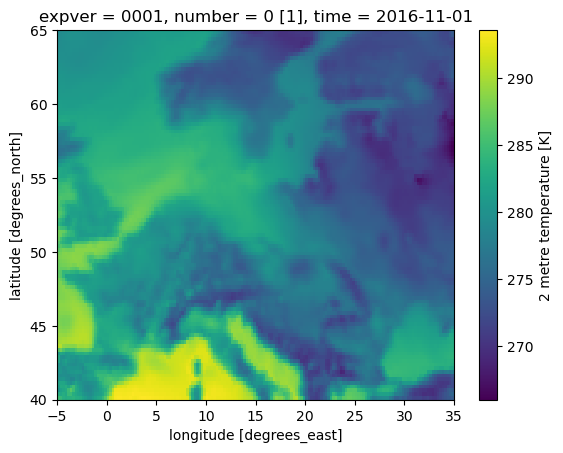

In [28]:
ds.t2m.isel(time=0).plot()

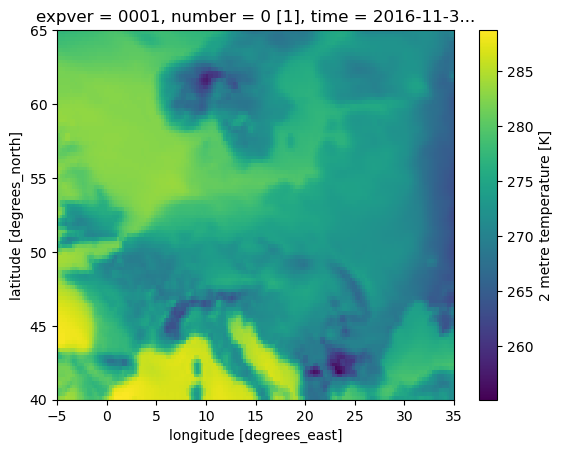

In [29]:
ds.t2m.isel(time=-1).plot()

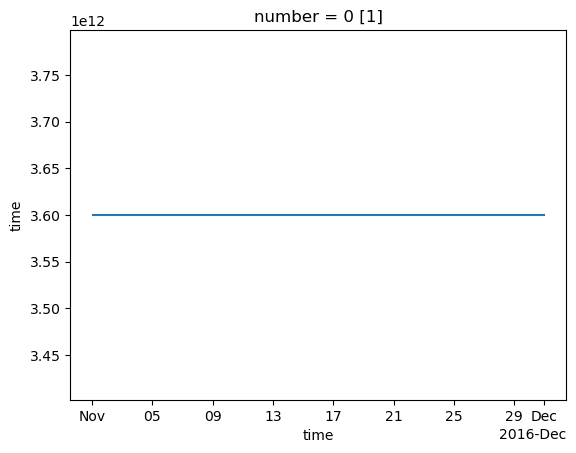

In [30]:
ds.time.diff("time").plot()

In [ ]:
for data_id in data_ids:
    store_team.delete_data(data_id)